# Classify and Study the motion of Worms

# Phases
A typical data science project has several phases (Cross-Industry Standard Process for Data Mining (CRISP-DM)). Phases adapted to this project
1) Business Understanding: Understand the business problem and define the objectives of the project.

2) Data Understanding: Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.
- Load Data
- Exploratory Data Analysis (EDA): Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings
a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
b) Data Visualization: Presenting insights through plots, charts, and graphs to communicate findings effectively

3) Data Preparation: Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

4) Modeling / Select and Train Models: We create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Train model

5) Evaluation: We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation
- Fine-tune Models  
- Model Evaluation on Test Set

6) Deployment: Deploy the model into production and monitor its performance over time.


# 1) Business Understanding
Understand the business problem and define the objectives of the project.

## Objective
The main goal of this project is to answer to those questions:
* Can we classify the type of worm using the information provided by the eigenworm series? (Objective 1)
* For a specific worm, how can we model its motion, i.e., the eigenworm? (Objective 2)

## Introduction
Caenorhabditis elegans is a roundworm commonly used as a model organism in the study of genetics. The movement of these worms is known to be a helpful indicator for understanding behavioral genetics. Brown et al. (2013) describe a system for recording the motion of worms on an agar plate and measuring a range of human-defined features. It has been shown that the space of shapes Caenorhabditis elegans adopts on an agar plate can be represented by combinations of four base shapes, or eigenworms. Once the worm outline is extracted, each frame of worm motion can be captured by four scalars representing the amplitudes along each dimension when the shape is projected onto the four eigenworms.

## Dataset
The data relates to 258 traces of worms converted into four "eigenworm" series. The eigenworm data are lengths from 17984 to 100674 (sampled at 30 Hz, so from 10 minutes to 1 hour) and in four dimensions (eigenworm 1 to 4). There are five classes: N2, goa-1, unc-1, unc-38 and un63. N2 is wildtype (i.e., normal) the other 4 are mutant strains. These datasets are the first dimension only (first eigenworm) averaged down so that all series are lengths 900 (the single hour-long
series is discarded). This smoothing is likely to discard discriminatory information. We address the problem of classifying individual worms as wild-type or mutant based on the time series of the first eigenworm, down-sampled to second-long intervals. We have 258 cases, which we split 70%/30% into a train and test set. Each series has 900 observations, and each worm is classified as either wild-type (the N2 reference strain – 109 cases; class 1) or one of four mutant
types (149 cases; class 2): goa-1 (44 cases); unc-1 (35 cases); unc-38 (45 cases) and unc-63 (25 cases). The data were extracted from the C. elegans behavioral database WormWeb.

The following files are provided:
- “worms_trainset.csv” – file with the training dataset, where the first column has the class
label (181x901 matrix)
- “worms_testset.csv” – file with the test dataset, where the first column has the class label
(77x901 matrix)

## Can we classify the type of worm using the information provided by the eigenworm series? (Objective 1)

# 2) Data Understanding
Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.

## Import modules

In [1]:
!pip install tslearn --user

In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.metrics import accuracy_score
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings as w
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro

## Load Data
read worms_trainset.csv from csv file

In [3]:
path_file_name = 'worms_trainset.csv'
path_file_name_test = 'worms_testset.csv'

worms_trainset = pd.read_csv(path_file_name) #dataset with train dataset
worms_testset = pd.read_csv(path_file_name_test) #dataset with test dataset

print ( f"worms_trainset shape {worms_trainset.shape} \n")

print ( f"worms_testset shape {worms_testset.shape} \n")


# show first 5 column
print (f"worms_trainset.head() \n {worms_trainset.head()}")
print (f"worms_testset.head() \n {worms_testset.head()}")

worms_trainset shape (180, 901) 

worms_testset shape (76, 901) 

worms_trainset.head() 
    1.0  1.6605051  1.7390916  1.8127664  1.847148  1.9011762  1.9355578  \
0  1.0  -0.379133   0.242145  -0.517195 -0.033979   0.587299  -0.517195   
1  1.0   0.534425   0.444349   0.399312  0.511906   0.669539   0.714577   
2  1.0  -2.438882  -2.412564  -2.438882 -2.333611  -2.267818  -2.307294   
3  1.0   1.601259   1.601259   1.589440  1.589440   1.589440   1.589440   
4  1.0   0.998721   0.931575   1.014708  1.014708   1.014708   1.027498   

   1.9060879  1.9453811  1.9257345  ...  -0.36309684.3  -0.4220367.2  \
0  -0.172040   0.035052   0.518269  ...      -3.485523     -3.623585   
1   0.511906   0.692058   0.489387  ...       3.799677      3.934791   
2  -2.412564  -2.162547  -2.241500  ...      -1.715148     -1.767783   
3   1.589440   1.577622   1.577622  ...       3.445002      3.208625   
4   1.056275   1.097841   1.113828  ...      -1.194709     -1.156340   

   -0.39747843.2  -0.40239

## Create a header: column names for all columns

In [4]:
# Class plus  t0 tn cols

# Define the column names
column_names_train = ['class'] + ['t{}'.format(i) for i in range(worms_trainset.shape[1]-1)]

print (f"column_names_train {column_names_train}")

# Set the column names
worms_trainset.columns = column_names_train

# worms_testset 
# Define the column names
column_names_test = ['class'] + ['t{}'.format(i) for i in range(worms_testset.shape[1]-1)]

print (f"column_names_test {column_names_test}")

# Set the column names
worms_testset.columns = column_names_test

# Info
print ( f"worms_trainset shape {worms_trainset.shape} \n")
print ( f"worms_testset shape {worms_testset.shape} \n")

# show first 5 column
print (f"worms_trainset.head() \n {worms_trainset.head()}")
print (f"worms_testset.head() \n {worms_testset.head()}")

column_names_train ['class', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53', 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90', 't91', 't92', 't93', 't94', 't95', 't96', 't97', 't98', 't99', 't100', 't101', 't102', 't103', 't104', 't105', 't106', 't107', 't108', 't109', 't110', 't111', 't112', 't113', 't114', 't115', 't116', 't117', 't118', 't119', 't120', 't121', 't122', 't123', 't124', 't125', 't126', 't127', 't128', 't129', 't130', 't131', 't132', 't133', 't134', '

## Exploratory Data Analysis (EDA)
Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings

a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
i) Get a quick description of the data: (info (), for categorical atributes use value_counts())
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many (value_counts())
--- Group Data: Understanding  effect of different categorical attributes on other data variables.
---- Group by: (DF.groupby(['education', 'vote']).mean() )
---- or pivotable...
- Check of non-null

ii) Descriptive Statistics (describe ())
- summary of the numerical attributes 
-- Check for outliers: Significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers.
- feature target-wise statistical analysis

b) Data Visualization: Visualizing data distributions, and identifying patterns or relationships. Presenting insights through plots, charts, and graphs to communicate findings effectively.
- Visualizing Geographical Data (Long, Lat)

i) Histograms (for each numerical attribute). 
- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

ii) Check for outliers: Identify outliers and anomalies in the data.
box plots and other visualizations to identify these values.
sns.boxplot(df['variable'])

iii) Check for duplicates

iv) Looking for correlations: identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)
- Looking for correlations (corr)
- Heatmap for correlations
- details with scatter_matrix

- Univariate analysis can be done for both Categorical and Numerical variables. Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.
-- Distribution Plots (also called probability density function or PDF plots): FacetGrid
-- Box plots (feature with target)
-- Violin plots (feature with target) and underlying distribution

In [5]:
worms_trainset.info()
worms_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 901 entries, class to t899
dtypes: float64(901)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Columns: 901 entries, class to t899
dtypes: float64(901)
memory usage: 535.1 KB


In [6]:
worms_trainset.describe()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t890,t891,t892,t893,t894,t895,t896,t897,t898,t899
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.583333,-0.064291,-0.065017,-0.063687,-0.054981,-0.057459,-0.065366,-0.071222,-0.075473,-0.070040,...,0.099688,0.104324,0.105246,0.091169,0.090643,0.078197,0.073547,0.067658,0.067752,0.058794
std,0.494382,1.228183,1.212972,1.207888,1.206972,1.206928,1.205454,1.210743,1.208166,1.204137,...,1.283225,1.287452,1.267068,1.268230,1.267895,1.277308,1.263614,1.260002,1.281711,1.282489
min,1.000000,-3.739104,-3.719033,-3.731076,-3.715019,-3.755160,-3.751146,-3.803328,-3.799314,-3.731076,...,-3.485523,-3.623585,-3.027088,-3.278430,-3.003730,-3.278430,-3.002307,-2.970360,-2.957012,-3.071337
25%,1.000000,-0.854008,-0.854640,-0.809230,-0.812794,-0.863853,-0.825710,-0.859066,-0.883388,-0.886304,...,-0.922936,-0.885312,-0.877030,-0.877714,-0.859223,-0.860616,-0.853297,-0.934296,-0.921727,-0.936957
50%,2.000000,-0.003233,-0.034666,-0.060338,-0.037785,-0.021782,-0.019039,0.001231,-0.042209,-0.014604,...,0.109461,0.073305,0.034480,0.049945,0.036629,0.021704,0.019850,0.047611,0.034260,0.033797
75%,2.000000,0.750203,0.699233,0.749601,0.831119,0.854150,0.837433,0.845306,0.834400,0.836678,...,1.136707,1.173762,1.119435,1.084915,1.090188,1.097960,1.051917,1.065731,1.096654,1.092420
max,2.000000,3.482405,3.295940,3.109476,2.923011,2.736547,2.603414,2.583677,2.563941,2.542011,...,3.799677,3.934791,3.754639,4.024867,3.799677,3.777158,3.777158,3.574488,3.844715,3.574488


In [7]:
worms_testset.describe ()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,...,t890,t891,t892,t893,t894,t895,t896,t897,t898,t899
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.578947,-0.192069,-0.189175,-0.181068,-0.178807,-0.176880,-0.170950,-0.172420,-0.180324,-0.180246,...,-0.159047,-0.152441,-0.159850,-0.144918,-0.137770,-0.132926,-0.123438,-0.121947,-0.115584,-0.108170
std,0.497009,1.484918,1.440988,1.429251,1.395450,1.376559,1.361046,1.348735,1.341573,1.317002,...,1.089897,1.074808,1.074747,1.069314,1.067825,1.073469,1.061297,1.066026,1.062887,1.057805
min,1.000000,-4.539753,-4.346270,-4.447618,-4.355484,-4.198854,-4.189641,-4.088292,-3.996157,-3.894809,...,-2.860785,-2.599652,-2.559477,-2.418867,-2.401751,-2.437829,-2.469898,-2.526019,-2.550071,-2.558089
25%,1.000000,-1.181181,-1.163783,-1.130743,-1.055898,-1.049756,-1.032080,-1.014404,-1.013783,-1.076068,...,-1.056722,-1.011115,-0.960379,-0.934866,-0.905485,-0.833503,-0.817354,-0.837798,-0.889160,-0.925454
50%,2.000000,-0.210207,-0.153675,-0.131455,-0.138355,-0.136446,-0.139662,-0.172429,-0.192525,-0.163554,...,-0.155121,-0.144021,-0.172759,-0.124781,-0.143766,-0.120010,-0.144930,-0.166109,-0.146595,-0.079036
75%,2.000000,0.761011,0.770780,0.767794,0.669938,0.575837,0.594272,0.662421,0.659972,0.574929,...,0.491084,0.584827,0.583820,0.590970,0.573023,0.579136,0.582531,0.614534,0.630994,0.688149
max,2.000000,3.735155,3.604026,3.717671,3.437931,3.542833,3.534091,3.402963,3.455414,3.210642,...,2.303505,2.281459,2.272302,2.366447,2.466869,2.592396,2.504527,2.510804,2.535909,2.523356


In [8]:
#check for non null
print(worms_trainset.isnull().sum().sum())

#print(worms_trainset.isnull().mean()*100)
#print(worms_trainset.isnull().sum)

0


#### i) Histograms 

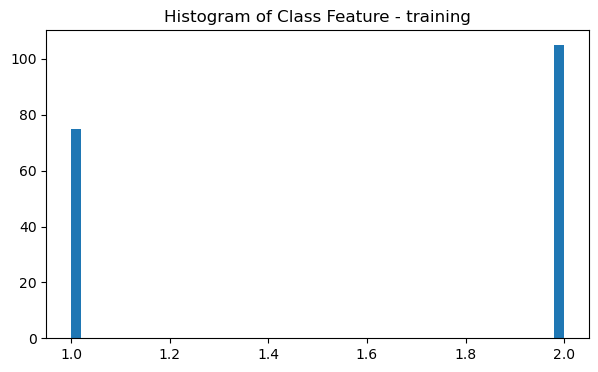

In [9]:
#hist, bin_edges = np.histogram(postures_all['User'], bins=50)
hist, bin_edges = np.histogram(worms_trainset.iloc[:, 0], bins=50) # all line for first column
plt.figure(figsize=(7,4))
plt.hist(worms_trainset.iloc[:, 0], bins=50)
plt.title('Histogram of Class Feature - training')
plt.show()

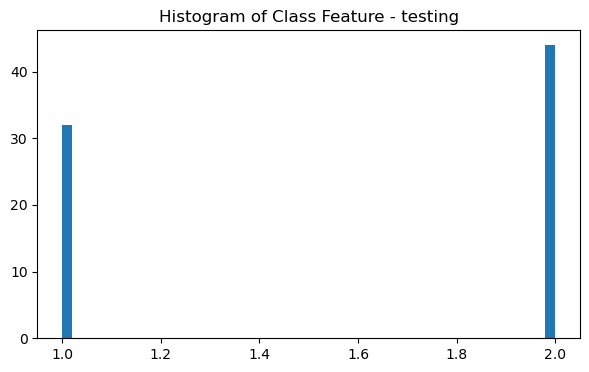

In [10]:
#hist, bin_edges = np.histogram(postures_all['User'], bins=50)
hist, bin_edges = np.histogram(worms_testset.iloc[:, 0], bins=50) # all line for first column
plt.figure(figsize=(7,4))
plt.hist(worms_testset.iloc[:, 0], bins=50)
plt.title('Histogram of Class Feature - testing')
plt.show()

#### ii) Check for outliers
Identify outliers and anomalies in the data.

In [11]:
# Calculate the z-score for each data point
z_scores = np.abs((worms_trainset - worms_trainset.mean()) / worms_trainset.std())

# Define a threshold value
threshold = 3 #3 times mean

# Identify the outliers
outliers = worms_trainset[z_scores > threshold]

# Count the number of outliers
num_outliers = outliers.count().sum()


print(f"outliers \n {outliers} \n")
print(f"outliers count \n {num_outliers} \n")



outliers 
      class  t0        t1        t2        t3       t4        t5        t6  \
0      NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
1      NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
2      NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
3      NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
4      NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
..     ...  ..       ...       ...       ...      ...       ...       ...   
175    NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
176    NaN NaN -3.719033 -3.731076 -3.715019 -3.75516 -3.751146 -3.803328   
177    NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
178    NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   
179    NaN NaN       NaN       NaN       NaN      NaN       NaN       NaN   

           t7        t8  ...  t890  t891  t892      t893  t894  

#### iii) Check for duplicates

In [12]:
duplicates = worms_trainset.duplicated().sum()
print(f"worms_trainset.duplicated().sum() \n {duplicates} \n")

worms_trainset.duplicated().sum() 
 23 



#### iv) Looking for correlations
identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)

In [13]:
corr_matrix = worms_trainset.corr() 
#Now let’s look at how much each attribute correlates with the Class value:
corr_matrix.iloc[:, 0].sort_values(ascending=False)

class    1.000000
t55      0.183731
t53      0.181734
t54      0.178280
t125     0.176262
           ...   
t218    -0.202813
t215    -0.205549
t214    -0.207341
t217    -0.212569
t216    -0.213772
Name: class, Length: 901, dtype: float64

# 3) Data preparation
Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively
---

Some of the basic pre-processing techniques:
1. Conversion of data – models can only handle numeric features; hence, categorical and ordinal data must be
somehow converted into numeric features
for instance convert: df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
Results-> All numerical
2. Scaling data – many modelling approaches require some uniformity in the independent variables. Some datasets
Results-> have outliers that may totally disrupt model results.
 - Common scaling methods: standardisation, range scaling, power transform, unit norm scaling, custom scaling
Results-> numeric need scaling with outliers
3. Missing values – do nothing, ignore or impute them.
Results-> There isn´t
4. Outliers detection – there are some error data that might be present in our dataset that deviates drastically from
other observations in a dataset (for example, human weight = 800kg; due to mistyping of extra 0)
Results-> scaling
5. Check for duplicates
Results-> There is

- Ensuring data quality

Apply transformers to atributes in dataframe in order to preprocessing and features extraction
- Handling Text and Categorical Attributes (01) - No need      
- Scaling (02) (04) to all numerical: have some: It will be done after with automation in Modelling 
- Data Cleaning (03) NA - Missing values, no need
- Data Cleaning (05) Duplicates
 
 

In [14]:
# Check for duplicates: 
duplicates = worms_trainset.duplicated().sum()
print(f"worms_trainset.duplicated().sum() \n {duplicates} \n")
if duplicates > 0:
    # Remove duplicates
    worms_trainset.drop_duplicates(inplace=True) #modify the original dataframe instead of creating a new one. 
    print(f"After remove duplicates worms_trainset.duplicated().sum() \n {worms_trainset.duplicated().sum()} \n")
    print ( f" \n worms_trainset shape {worms_trainset.shape} \n")


worms_trainset.duplicated().sum() 
 23 

After remove duplicates worms_trainset.duplicated().sum() 
 0 

 
 worms_trainset shape (157, 901) 



We eliminated the duplicates found because the 23 duplicated instances represent 11% of the train set, which is a big enough percentage that may influence the prediction.

# 4) Modeling / Select and Train Models
Create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Train model: Best Model/Representation Method for Classification

In [15]:
# Split data in  X and y (we could have a phase of Modelling...)

X_train = worms_trainset.iloc[:, 1:] #all columns except the first
X_test = worms_testset.iloc[:, 1:] #all columns except the first

y_train = worms_trainset.iloc[:, 0]
y_test = worms_testset.iloc[:, 0]

print ( f"X_train shape {X_train.shape} \n")
print ( f"y_train shape {y_train.shape} \n")

print ( f"X_test shape {X_test.shape} \n")
print ( f"y_test shape {y_test.shape} \n")


X_train shape (157, 900) 

y_train shape (157,) 

X_test shape (76, 900) 

y_test shape (76,) 



### Best Model/Representation Method for Classification

To answer the first research question of this project we will find the best classifier model and/or representation model for our dataset.
To do so we will try different scalers, models and representation methods combinations, with 4 Scalers, 4 Representation methods and 14 models.

Scalers:
* PowerTransformer()
* MinMaxScaler()
* StandardScaler()
* TimeSeriesScalerMeanVariance(mu=0, std=1)

Representation methods:
* PiecewiseAggregateApproximation(n_segments=12)
* PiecewiseAggregateApproximation(n_segments=16)
* SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=40)
* SymbolicAggregateApproximation(n_segments=32, alphabet_size_avg=40)

Models:
* LogisticRegression(C = 0.01)
* DecisionTreeClassifier(max_depth = 10)
* DecisionTreeClassifier(min_samples_leaf = 5)
* DecisionTreeClassifier(criterion = 'gini')
* DecisionTreeClassifier(criterion = 'entropy')
* GaussianNB()
* KNeighborsClassifier(n_neighbors = 1,weights = 'distance')
* KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'euclidean')
* KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'dtw')
* KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'sax',metric_params = dict)
* RandomForestClassifier(n_estimators=50, random_state=0)
* RandomForestClassifier(n_estimators=10, random_state=0)
* SVC(C=50,gamma='auto')
* SVC(C=10,gamma='auto')


We chose the C = 0.01 in the **LogisticRegression** Classification model because the
dataset has a good number of features and low C values have a stronger regularization and
helps prevent the overfitting of the model.

In the **DecisionTreeClassifier** model we tested a diverse set of hyperparameters using only one value for the
max_depth and min_sample_leaf hyperparameters and 2 other simpler hyperparameters
criterion = gini and criterion = entropy.

Only one Naïve Bayes Model, that assumes that each variable is normally distributed and
therefore can be modeled as a Gaussian.

We know from a baseline that the KNN model is intrinsically slower than most supervised
learning models so we just chose one model to test.

The **KNeighborsTimeSeriesClassifier** model implements the k-nearest neighbor for time series. 

With this model we have three possible metrics:
* 1-NN with Euclidean distance
* 1-NN with DTW
* 1-NN with SAX, in this case we need to set two other parameters: `n_segments` and `alphabet_size_avg`. The first parameter means the number of Piecewise Aggregate Approximation pieces to compute and the latter is the number of SAX symbols to use. To fix these parameters, we use the parameter `metric_params` and provide a dictionary with the two parameters required.

We chose the **RandomForestClassifier** model because its one of the best classification models and it is suprisingly robust and does not overfit easily.

And finally the **Support Vector Classifier(SVC)** model, because SVMs are among the best learning algorithms extant and they are also extremely powerful.

The evaluation metric used to evaluate the classification models and representation methods performance was the **F1-Score**. 

To find the best classification models we only combined each model with different scalers. For the representation methods case, we combined each scaler with each representation method with each classifier model.

With that scenario in mind, we created 2 tables:
* The **Results for Classification Models Performance** table with the Precision, Recall, F1 and the Matthews Correlation Coefficient (MCC) scores, the name of the scaler used and the name of the model.
* The **Results for Representation Methods Performance** table with the same information has the first one but with an additional information about the representation method used.

We present the previous tables in an output, with all the results.

#### Auxiliar Functions

Functions to help obtain the best classifier model and/or representation method.

In [16]:
# Execute list of scalers, representation methods, models and present the results 
def test_models (scalers, representation_models, models, X_train, y_train, X_test,y_test, show_rep_model, show_model):
    results =[]
    ct = 0
    for name_scaler, scaler in scalers:
        if show_rep_model:
            for name_rep_method, rep_method in representation_models:
                for name_mod, model in models:
                    #scaling
                    scaler.fit(X_train)
                    Xt_train = scaler.transform(X_train)
                    Xt_test  = scaler.transform(X_test)

                    #representation methods
                    rep_method.fit_transform(Xt_train)
                    rep_method.fit_transform(Xt_test)

                    #ignore warnings
                    w.filterwarnings('ignore')

                    #len of the array
                    if len(Xt_train.shape) == 2:
                        model.fit(Xt_train, y_train)
                        preds = model.predict(Xt_test)
                    else:
                        model.fit(Xt_train[:,:,0], y_train) #[:,:,0] to have only 2 dimensions
                        preds = model.predict(Xt_test[:,:,0]) #PREDICTION

                    #save results
                    results = save_results (name_scaler, scaler, name_rep_method, rep_method, name_mod, model, results,y_test, preds, show_model)
        else:
            for name_mod, model in models:
                    #scaling
                    scaler.fit(X_train)
                    Xt_train = scaler.transform(X_train)
                    Xt_test  = scaler.transform(X_test)

                    #ignore warnings
                    w.filterwarnings('ignore')

                    #len of the array
                    if len(Xt_train.shape) == 2:
                        model.fit(Xt_train, y_train)
                        preds = model.predict(Xt_test)
                    else:
                        model.fit(Xt_train[:,:,0], y_train) #[:,:,0] to have only 2 dimensions
                        preds = model.predict(Xt_test[:,:,0]) #PREDICTION

                    #save results
                    results = save_results (name_scaler, scaler, "", "", name_mod, model, results,y_test, preds, show_model)

        #present model number
        if show_model:
            ct += 1
            print("\nModel %d" % ct)

    
    results_sorted = sorted(results, key=lambda x: x[8], reverse=True) #f1 sorted decreasing
    display_results(results_sorted, show_rep_model)
    return results



# Save the model scores and present intermediate results (w/ show_model)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_rep_method, rep_method, name_mod, model, results, y_test, preds, show_model):

    # Calculate the precision, recall, f1 and mcc scores
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    mcc = matthews_corrcoef(y_test, preds)
    
    if show_model:
        print(f"Scaler: {scaler} rep method: {rep_method} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_rep_method, 
                    rep_method, 
                    name_mod, 
                    model,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results, show_rep_model):        
    
    noshow = ""
    if show_rep_model:
        print (f"\n--------------------------Results for Representation Methods Performance--------------------------")
    else:
        print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_rep_method = res [2]
        rep_method = res [3]
        name_mod = res [4]
        model = res [5]
        precision = res [6]
        recall = res [7]
        f1 = res [8]
        mcc = res [9]

        if show_rep_model:
            print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
            print(f"{noshow.ljust(25)} | scaler {scaler} | rep method {rep_method}")
        else:
            print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
            print(f"{noshow.ljust(25)} | scaler {scaler}")


In [17]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler()),
    ('TimeSeriesScalerMeanVariance', TimeSeriesScalerMeanVariance(mu=0, std=1))
]

# Defining a list of representation methods
representation_models = [
    ('PiecewiseAggregateApproximation_ns10', PiecewiseAggregateApproximation(n_segments=12)),
    ('PiecewiseAggregateApproximation_ns16', PiecewiseAggregateApproximation(n_segments=16)),
    ('SymbolicAggregateApproximation_ns10', SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=40)),
    ('SymbolicAggregateApproximation_ns10', SymbolicAggregateApproximation(n_segments=32, alphabet_size_avg=40))
]

dict = {'n_segments' : 16 , 'alphabet_size_avg': 10}

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K1_wdist', KNeighborsClassifier(n_neighbors = 1,weights = 'distance')),
    ('KNNTM_K1_eu', KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'euclidean')),
    ('KNNTM_K1_dtw', KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'dtw')),
    ('KNNTM_K1_sax', KNeighborsTimeSeriesClassifier(n_neighbors = 1, metric = 'sax',metric_params = dict)),
    ('RandomForestClassifier_ne50',RandomForestClassifier(n_estimators=50, random_state=0)),
    ('RandomForestClassifier_ne10',RandomForestClassifier(n_estimators=10, random_state=0)),
    ('SVC_c50',SVC(C=50,gamma='auto')),
    ('SVC_c10',SVC(C=10,gamma='auto'))
]

SHOW_REP_MODEL = False #false will not present the representation methods
SHOW_MODEL = False #True to present/print the progress of the model performance

#First run will be just with the scalers and the classification models
test_models(scalers, representation_models, classification_models, X_train, y_train, X_test,y_test, SHOW_REP_MODEL, SHOW_MODEL)

SHOW_REP_MODEL = True

#Second run, for representation models
test_models(scalers, representation_models, classification_models, X_train, y_train, X_test,y_test, SHOW_REP_MODEL, SHOW_MODEL)


--------------------------Results for Classification Models Performance--------------------------
SVC_c10                   | precision     0.5854 | recall     0.7500 | f1     0.6575| mcc     0.3602
                          | scaler StandardScaler()
RandomForestClassifier_ne50 | precision     0.6364 | recall     0.6562 | f1     0.6462| mcc     0.3820
                          | scaler PowerTransformer()
RandomForestClassifier_ne50 | precision     0.6364 | recall     0.6562 | f1     0.6462| mcc     0.3820
                          | scaler MinMaxScaler()
RandomForestClassifier_ne50 | precision     0.6364 | recall     0.6562 | f1     0.6462| mcc     0.3820
                          | scaler StandardScaler()
RandomForestClassifier_ne50 | precision     0.6364 | recall     0.6562 | f1     0.6462| mcc     0.3820
                          | scaler TimeSeriesScalerMeanVariance(mu=0, std=1)
SVC_c10                   | precision     0.5750 | recall     0.7188 | f1     0.6389| mcc     0.3287
  


--------------------------Results for Representation Methods Performance--------------------------
SVC_c10                   | precision     0.5854 | recall     0.7500 | f1     0.6575| mcc     0.3602
                          | scaler StandardScaler() | rep method PiecewiseAggregateApproximation(n_segments=12)
SVC_c10                   | precision     0.5854 | recall     0.7500 | f1     0.6575| mcc     0.3602
                          | scaler StandardScaler() | rep method PiecewiseAggregateApproximation(n_segments=16)
SVC_c10                   | precision     0.5854 | recall     0.7500 | f1     0.6575| mcc     0.3602
                          | scaler StandardScaler() | rep method SymbolicAggregateApproximation(alphabet_size_avg=40, n_segments=10)
SVC_c10                   | precision     0.5854 | recall     0.7500 | f1     0.6575| mcc     0.3602
                          | scaler StandardScaler() | rep method SymbolicAggregateApproximation(alphabet_size_avg=40, n_segments=32)
Random

[('PowerTransformer',
  PowerTransformer(),
  'PiecewiseAggregateApproximation_ns10',
  PiecewiseAggregateApproximation(n_segments=12),
  'LogisticRegression',
  LogisticRegression(C=0.01),
  0.4358974358974359,
  0.53125,
  0.47887323943661975,
  0.03086868887523331),
 ('PowerTransformer',
  PowerTransformer(),
  'PiecewiseAggregateApproximation_ns10',
  PiecewiseAggregateApproximation(n_segments=12),
  'DecisionTree_maxd10',
  DecisionTreeClassifier(max_depth=10),
  0.4666666666666667,
  0.4375,
  0.45161290322580644,
  0.07460921467460303),
 ('PowerTransformer',
  PowerTransformer(),
  'PiecewiseAggregateApproximation_ns10',
  PiecewiseAggregateApproximation(n_segments=12),
  'DecisionTree_minsl20',
  DecisionTreeClassifier(min_samples_leaf=5),
  0.45454545454545453,
  0.46875,
  0.4615384615384615,
  0.05942740424390226),
 ('PowerTransformer',
  PowerTransformer(),
  'PiecewiseAggregateApproximation_ns10',
  PiecewiseAggregateApproximation(n_segments=12),
  'DecisionTree_critgini',

# 5) Evaluation

The best classification model obtained was the **SupportVectorClassifier(C=10,gamma='auto')** with a **StandarScaler()** scaler with a `Precison Score` of 0.5854, `Recall Score` of 0.7500, `F1-Score` of 0.6575 and a `MCC Score` of 0.3602.

The Support Vector Machine classifier model got the best result (SVC), with the hyperparameter C = 10 and gama  = 'auto. **The gamma parameter controls the width of the Gaussian Kernel** it determines the scale of what it means for points to be close together. The **C parameter** is a regularization parameter similar to the linear models, it limits the importance of each point, so a low **C** can avoid the overfitting of the model.

This makes sense in being the best classification
model combined with the Scaler **StandardScaler()**, as we found in the EDA the dataset has outliers and the  StandarScaler
manage to handle outliers .

The best representation method obtained was the **PiecewiseAggregateApproximation(n_segments=12)** with a **StandardScaler()** scaler and a **SupportVectorClassifier(C=10,gamma='auto')** model with `Precison Score` of 0.5854, `Recall Score` of 0.7500, `F1-Score` of 0.6575 and a `MCC Score` of 0.3602. The same values and same best model that without  representation method.

The **PiecewiseAggregateApproximation** representation method reduces the dimensionality of the time series dataset by splitting them into 12 equal-sized segments in this case which are computed by averaging the values in these segments. The StandardScaler makes all variables of the dataset directly comparable by subtracting the mean and dividing it by the standard deviation. As we can see here the representation method doesn't improve the performance.

The dataset has only 258 traces of worn (180 traces for training, from which 23 were duplicates so just 157 traces for training, and 78 traces for testing). Each trace had 900 observations. We just needed to classify each trace of worn like class 1:wild-type (has 109 cases: training+test), or class 2 mutant (four types) (has 149 cases: training+test). The training dataset (157 traces for training,) had no nulls, and just a few outliers (we used scaler). The best results that we got with classification models was: precision = 0.5854; recall = 0.7500, f1 = 0.6575; mcc = 0.3602 for two classes..... After analyzing the results, we can conclude that we can classify the type of worm using the information provided by the eigenworm, but the **dataset was small**, with only 157, w/ no duplicates, traces for trainning and 78 traces for testing, that made our classification challenging, so the **results are promising, but there is still room for improvement, mainly if we obtain more data to train**.


## For a specific worm, how can we model its motion, i.e., the eigenworm? (Objective 2)
Perform time series analysis to model the movement of one single worm. In this case, we
will consider the worm in the train set indexed by 5.

###  Time Series Forecasting
A time series forecast process is a set of steps that leads you from defining your problem through to the outcome of having a time series forecast model or set of predictions. The process extends beyond the development of a model and making forecasts and involves iterative loops, through an 8-step iterative forecast development process.

The process can be summarized as follows:
1. Define goal
2. Get data
3. Explore and visualize series
4. Pre-process data
5. Partition series
6. Apply forecasting method(s)
7. Evaluate and compare performance
8. Implement forecasts/systems

Below are the iterative loops within the process:
* Explore and visualize series &Rightarrow; Get data. Data exploration can lead to questions that require acess to new data.
* Evaluate and compare performance &Rightarrow; Apply forecasting method(s). The evaluation of models may rise questions or ideas for new methods or new method configurations to try.

Some of these steps are not possible to perform (e.g., get more data) since it might be expensive to collect more data. However, we will work through a time series forecasting project from end-to-end, from downloading the dataset and defining the problem to training a final model and making predictions. The steps we will work through are as follows:
1. Problem description
2. Test harness
3. Persistence
4. Data analysis
5. ARIMA models
6. Model validation

## 1) Problem description

The problem is to predict, for a specific worm, how can we model its motion, i.e., the eigenworm
Perform time series analysis to model the movement of one single worm. In this case, we will consider the worm in the train set indexed by 5.

(157, 900)
(900,)


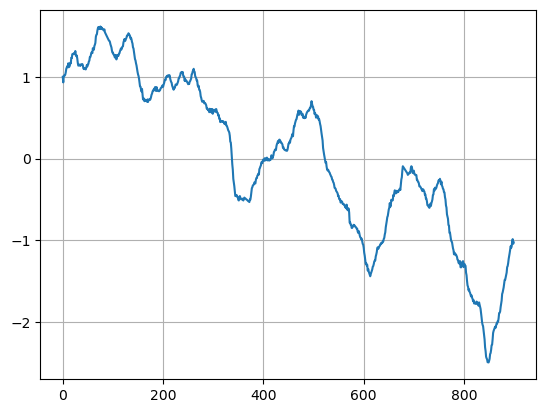

In [51]:
from  pandas import read_csv

# Extract the eigenworms
# eigenworms = series.iloc[:, 1:] #worms_trainset data processed with remove duplicates but without  scaling
eigenworms = X_train #worms_trainset data processed with remove duplicates but without  scaling
print(eigenworms.shape)

# No need Scaling
#scaler = TimeSeriesScalerMeanVariance(mu=0, std=1)
#scaler.fit(eigenworms)
#eigenworms = scaler.transform(X_train) # adds another dimension
#print (f"eigenworms.shape after scaler {eigenworms.shape}")

#eigenworms = eigenworms[:,:,0] # retrieve the last dimension
#eigenworms = pd.DataFrame (eigenworms) #convert into df

#print (f"eigenworms.shape {eigenworms.shape}")

# Select the worm to model: train set index 5
#worm = eigenworms.iloc[4, :] #0..4 index 5
worm = X_train.iloc[4, :] #0..4 index 5, and without scaling

# print(worm)
print (worm.shape)
# worm.plot() # visualize data

plt.plot(range(0,900), worm)#  X_train.iloc[4])
plt.grid()
plt.show()

#pyplot.plot([x for x in worm]) #works well with x...



## 2) Test harness

We must develop a test harness to investigate the data and evaluate candidate models. This involves two steps:
- Defining a validation dataset
- Developing a method for model evaluation

### Validation dataset

From the 900 observations, the final 100 will be used to validate the final model (the so-called independent validation set). Thus, we will create two datasets:
* `dataset`: first 800 observations 
* `validation`: Last 100 observations

The validation set is ~ 11 % of the original dataset.

In [54]:
# split data to have an independent validation set
split_point = len(worm) - 100
dataset, validation = worm[0:split_point], worm[split_point:]

print(f"dataset.shape: {dataset.shape}")
print(f"dataset[0]: {dataset[0]}")

print(f"validation.shape: {validation.shape}")
print(f"validation[99]: {validation[99]}")

dataset.shape: (800,)
dataset[0]: 0.99872124
validation.shape: (100,)
validation[99]: -1.0252456


### Model evaluation

Model evaluation will only be performed on the data in `dataset` prepared previously. Model evaluation involves two elements:
1. Performance measure
2. Test strategy

**Performance measure**

The observations are a count of the movement of one single worm. We will evaluate the performance of predictions using the root mean squared error (RMSE). This will give more weight to predictions that are grossly wrong and will have the same units as the original data. Any transforms to the data must be reversed before the RMSE is calculated and reported to make the performance between different methods directly comparable.

We can use the function `mean_squared_error()`from scikit-learn to calculate the mean squared error between a list of expected values (the test set) and the list of predictions.

**Test strategy**

Candidate models will be evaluated using walk-forward validation. This is because a rolling-forecast type model is required from the problem definition. This is where one-step forecasts are needed given all available data. The walk-forward validation will work as follows:
1. The first 50% of the dataset will be held back to train the model.
2. The remaining 50% of the dataset will be iterated and test the model.
3. For each step in the test dataset:
  * A model will be trained
  * A one-step prediction made and the prediction stored for later evaluation
  * The actual observation from the test dataset will be added to the training dataset for the next iteration
4. The predictions made during the iteration of the test dataset will be evaluated and an RMSE score reported

## 3) Persistence model

The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance. This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared. The baseline prediction for time series forecasting is called the naive forecast, or persistence. This is where the observation from the previous time step is used as the prediction for the observation at the next time step. We can plug this directly into the test harness defined previously.

In [20]:
# evaluate a persistence model
from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare data
X = dataset.values
X = X.astype('float32')
train_size = int(len(X) * 0.50) # split dataset 50% for training and 50% for testing
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  yhat = history[-1] # this method only uses the last observation as prediction
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 0.029


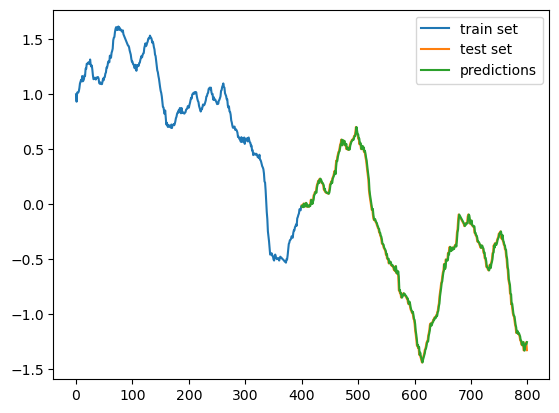

In [21]:
from matplotlib import pyplot
import numpy as np

t = np.array([x for x in test])
t = t.flatten()

# plot predictions and expected results
pyplot.plot(train)
#pyplot.plot([None for i in train] + t)
pyplot.plot([None for i in train] + [x for x in t])
pyplot.plot([None for i in train] + [x for x in predictions])
pyplot.legend(['train set','test set','predictions'])
pyplot.show()

## 4) Data analysis

We can use summary statistics and plots of the data to quickly learn more about the structure of the prediction problem. Here, we will look at the data from four perspectives:
- Summary statistics
- Line plot
- Seasonal line plots
- Density plots

### Summary statistics

The first thing to do is to verify if the data has missing observations. Summary statistics provide a quick look at the limits of observed values. It can help to get a quick idea of what we are working with.

#### Get the summary statistics from a `Series` object from pandas. Analyse the result.

In [22]:
print (dataset.describe())
print (dataset.info ())
print (dataset.shape)

count    800.000000
mean       0.221907
std        0.814087
min       -1.441711
25%       -0.430765
50%        0.225071
75%        0.936092
max        1.616722
Name: 4, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: 4
Non-Null Count  Dtype  
--------------  -----  
800 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB
None
(800,)


Some observations:
* The number of observations (count) matches our expectation, meaning we are handling the data correctly.
* The mean is about 0,221, which we might consider our level in this series.
* The mean is similar to the median (50%) so almost no outliers
* The standard deviation (average spread from the mean) is relatively large at 0,81.


### Line plot

A line plot of a time series can provide a lot of insight into the problem.

dataset[799]: -1.329739449689778


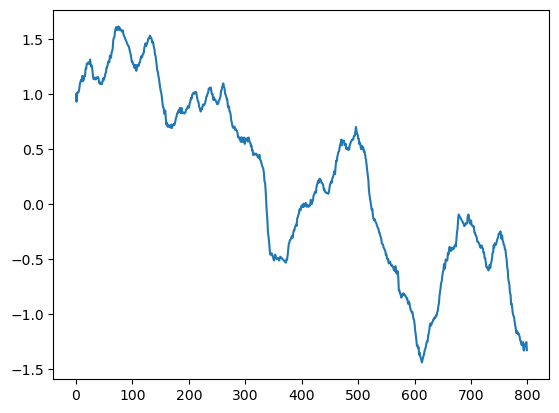

In [42]:
# dataset.plot()
pyplot.plot([x for x in dataset])

print(f"dataset[799]: {dataset[799]}")

Note any obvious temporal structures in the series. Some observations from the plot include:
* There is an decreasing trend of y over time.
* There do not appear to be any obvious outliers.
* There appears to be systematic seasonality to the movement of the  worm for each 150/210.
* The seasonal signal appears to be growing over time, suggesting a multiplicative relationship (increasing change).
* The seasonality suggests that the series is almost certainly non-stationary.

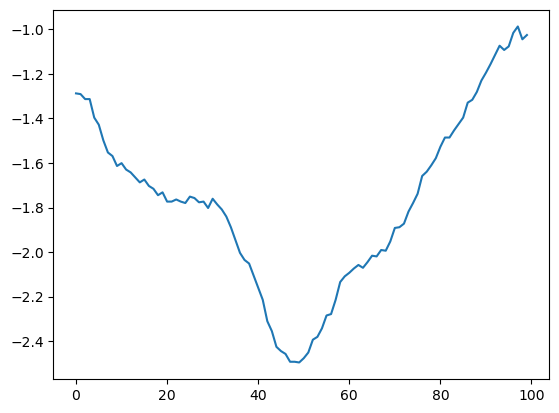

In [57]:
# validation.plot()
pyplot.plot([x for x in validation])

### Seasonal plots

We can confirm the assumption that the seasonality is a 150/200 (but growing) cycle by eyeballing line plots of the dataset by 150/210. Creating one line plot for each 150/200, we can see a similar pattern, although at different levels.

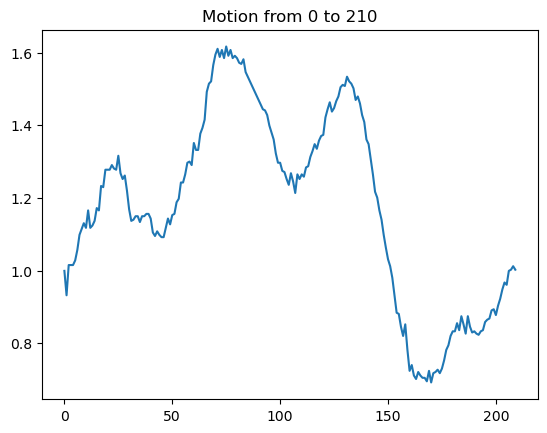

<Figure size 200x100 with 0 Axes>

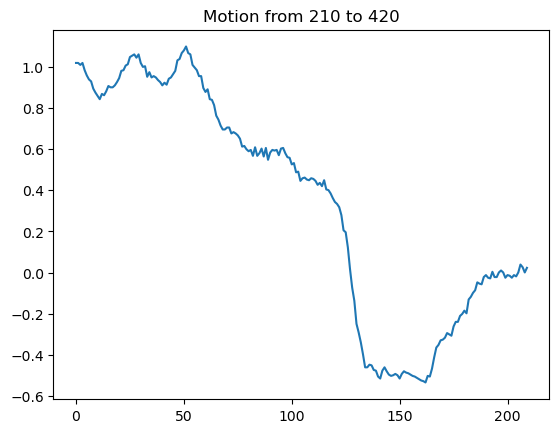

<Figure size 200x100 with 0 Axes>

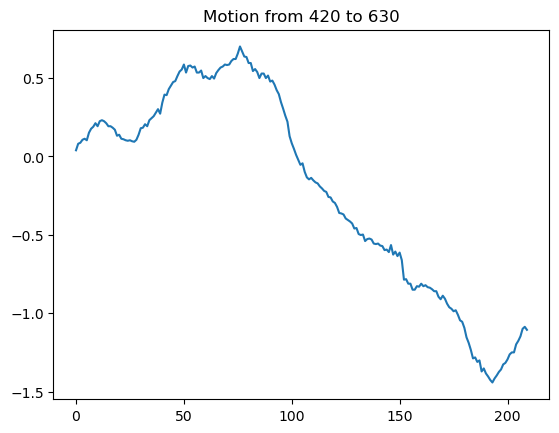

<Figure size 200x100 with 0 Axes>

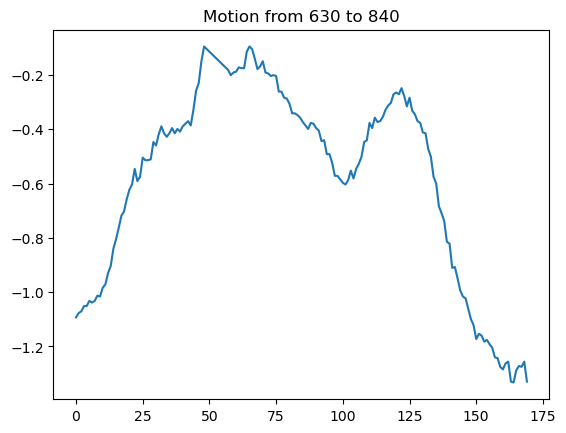

<Figure size 200x100 with 0 Axes>

In [24]:
# Create line plots for each 210
seasonal_plots = 210
for i in range(0, dataset.shape[0], seasonal_plots): #with just one row, shape[0] is not row but column number
    
    plt.title (f"Motion from {i} to {i+seasonal_plots}")
    # plt.plot(dataset.iloc[i+seasonal_plots,])
    seasonal = dataset[i:i+seasonal_plots] # just one line 
    #plt.plot(seasonal)
    pyplot.plot([x for x in seasonal])
    #plt.xticks(range(i, i+150, 25))
    plt.figure(figsize=(2, 1))
    plt.show()

### Density plots

Reviewing plots of the density of observations can provide further insight into the structure of the data. 
We can see that the distribution is not Gaussian and the shape has two hights (motion y= -0,5 and y = 1).

Axes(0.125,0.11;0.775x0.77)


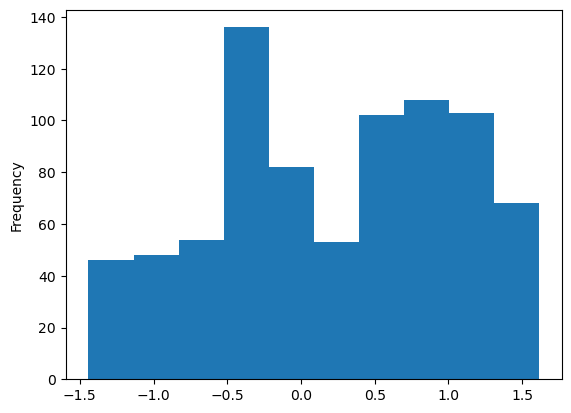

In [25]:
print (dataset.plot(kind='hist'))

Axes(0.125,0.11;0.775x0.77)


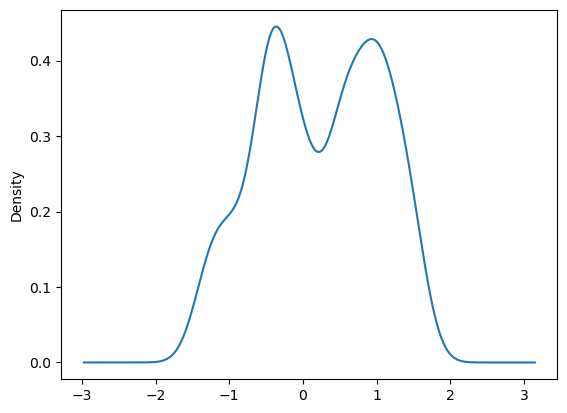

In [26]:
print (dataset.plot(kind='kde'))

## 5) ARIMA models

Now, we will develop Autoregressive Integrated Moving Average, or ARIMA, models for the problem. We will approach modeling by both manual and automatic configuration of the ARIMA model. This will be followed by a third step of investigating the residual errors of the chosen model. As such, we have 3 steps:
- Manually configure the ARIMA
- Automatically configure the ARIMA
- Review residual errors

### Manually configured ARIMA

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually. Analysis of the time series data assumes that we are working with a stationary time series. The time series is almost certainly non-stationary. We can make it stationary this by first differencing the series and using a statistical test to confirm that the result is stationary.

This time series has trend and seasonality. The seasonality in the series is seemingly 150/200. Seasonal data can be differenced by subtracting the observation from the same time in the previous cycle. This does mean that we will lose the first 150/200  of observations as there is no prior 150/200 to difference with.

Note: the simplest method to detrend a time series is calculating the diference between the original observation and the observationan at the previous time step.

Turn our dataset into a stationary time series by seasonaly differencing the series. Check the stationarity by applying the Dickey-Fuller test using the method [`adfuller`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) from the statsmodels package. Analyse the result and plot the new series.

 

210    0.019195
211    0.086378
212   -0.006398
213    0.003199
214   -0.031992
         ...   
795   -0.441489
796   -0.412697
797   -0.415896
798   -0.361509
799   -0.419095
Name: 4, Length: 590, dtype: float64
ADF Statistic: -3.3119693057116595
p-value: 0.014351850577817177
usedlag: 5
nobs: 584
critical values: {'1%': -3.4415970480373046, '5%': -2.866501759246704, '10%': -2.5694124827594296}
The time series is stationary.


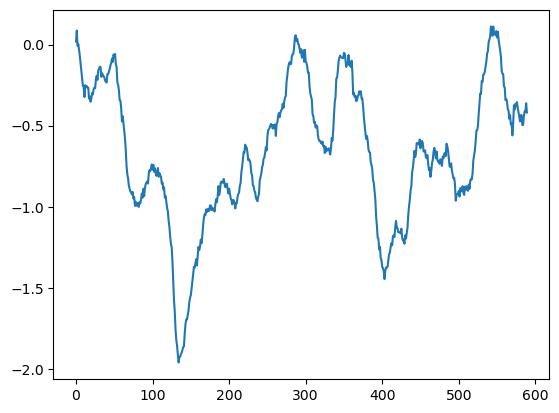

In [27]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

seasonal_plots = 210
    
# Seasonally difference the series with a seasonal interval of seasonal_plots observations
data_diff = dataset.diff(seasonal_plots)
data_diff = data_diff.dropna()  # Remove NaN values created by differencing

# Show the result
print(data_diff)

# print(data_diff.plot())
pyplot.plot([x for x in data_diff])

# Check stationarity using the Dickey-Fuller test
result = adfuller(data_diff, autolag='AIC')

# Print the test statistic, p-value, usedlag(nº of lags used), 
# nobs (nº of observations used), critical values (Critical values for the test statistic at the 1 %, 5 %, and 10 % levels)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("usedlag:", result[2])
print("nobs:", result[3])
print("critical values:", result[4])

# Check if the series is stationary based on the p-value
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


The results show that the test statistic value -3.311 is smaller than the critical value at 5% of -2.866. This suggests that we can reject the null hypothesis with a significance level of less than 5% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The plot does not show any obvious seasonality or trend, suggesting the seasonally differenced dataset is a good starting point for modeling.

The next first step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively. We can do this by reviewing Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. Note, we are going to use the stationary data as our dataset. This is because the manual seasonal differencing performed is different from the lag=1 differencing performed by the ARIMA model with the d parameter.

select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively

Usinf the methods [`plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf) and [`plot_pacf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf) from statsmodels package, chose potential values for p and q parameters of the ARIMA.

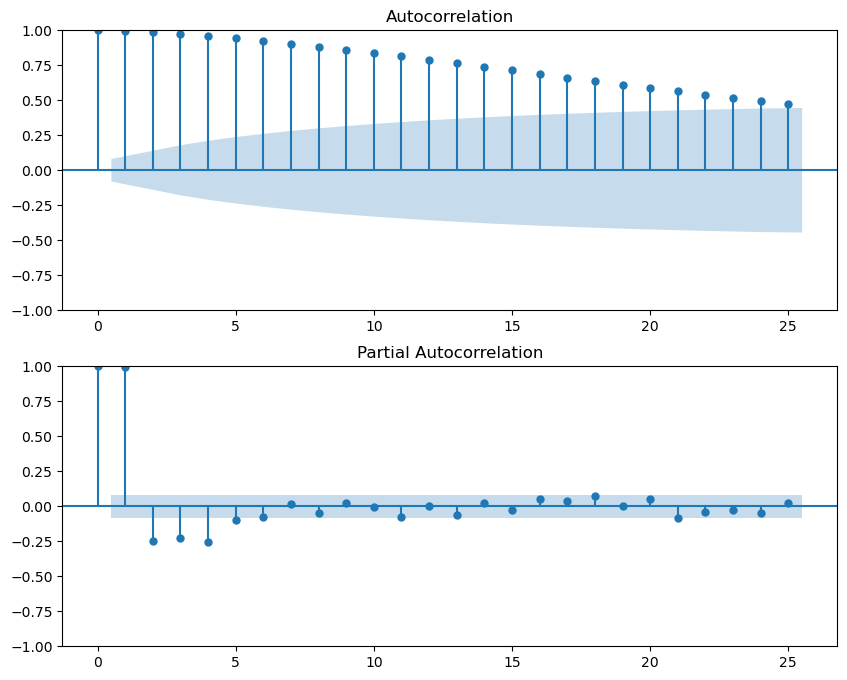

In [28]:
# data_diff #potencial stationery dataset

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_diff, lags=25, ax=ax[0]) # 300
plot_pacf(data_diff, lags=25, ax=ax[1]) # 300
plt.show()



select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively

In general, the ACF plot is used to identify the order of the Moving Average (MA) term, while the PACF plot is used to identify the order of the Autoregressive (AR) term.

If the ACF plot shows a sharp drop after lag k and the PACF plot shows a sharp cutoff after lag k, then we can use an AR(k) model -> (THIS AR(1) )<------------- 
If the ACF plot shows a sharp cutoff after lag k and the PACF plot shows a sharp drop after lag k, then we can use an MA(k) model. 
If both the ACF and PACF plots show a gradual decay, then we can use an ARMA model.

The ACF plot shows a sharp drop after lag k and the PACF plot shows a sharp cutoff after lag k, then we can use an AR(k) model, so for this case is k = 1 (AR(1)).

So we chose the p = 1, d = 0 because its a stationary data and q = 1 to train the ARIMA model.

In [29]:
# data_diff #stationery dataset

# train an ARIMA model following the walk-forward validation
from statsmodels.tsa.arima.model import ARIMA

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):

    X = X.astype('float32')
    train_size = int(len(X) * 0.50) # split dataset 50% for training and 50% for testing
    train, test = X[0:train_size], X[train_size:]

    # walk-forward validation
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
      # predict
      model = ARIMA(history, order=arima_order) 
      model_fit = model.fit() #disp=0
      yhat = model_fit.forecast()[0]
      predictions.append(yhat)
      # observation
      obs = test[i]
      history.append(obs)
      #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

    # report performance
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, test, predictions
    # print('RMSE: %.3f' % rmse)


print (f"data_diff.shape {data_diff.shape}")
# prepare data
X = data_diff.values #stationery dataset

rmse = evaluate_arima_model(X, (1, 0, 1)) # by observation of ACF, PACF plots for p, d, q ~ 1, 0, 1..
print('RMSE: {:.3f}'.format(rmse[0])) # RMSE Tuple, first result (returns the 3 variables in one)
#print(f"RMSE: {rmse}")
# print('RMSE: %.3f' % rmse)
    


data_diff.shape (590,)
RMSE: 0.041


### Automatically configure the ARIMA (Grid search ARIMA hyperparameters)
The ACF and PACF plots suggest that an ARIMA(1,0,1) or similar may be the best that we can do. To confirm this analysis, we can grid search a suite of ARIMA hyperparameters and check that no models result in better out of sample RMSE performance. We will search values of p, d, and q for combinations (skipping those that fail to converge), and find the combination that results in the best performance on the test set. We will use a grid search to explore all combinations in a subset of integer values.

 ARIMA model is trained over the stationary data (d = 0), then we should not include any values for d in the grid search.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings

# evaluate combinations of p, d and q values for an ARIMA mode, then return best_cfg and best_score
def evaluate_models_gsearch (dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None #positive infinity and None for being updated
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try: #treat errors from ARIMA
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse[0] < best_score:
                        best_score, best_cfg = rmse[0], order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse[0]))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg, best_score


# define the parameter values that should be searched
p_values = range(0, 6)
d_values = [0]
q_values = range(0, 6)

warnings.filterwarnings("ignore") # ignore warnings

#stationery dataset
print (f"data_diff.shape {dataset.shape}")

best_cfg, best_score = evaluate_models_gsearch (data_diff.values, p_values, d_values, q_values)

data_diff.shape (800,)
ARIMA(0, 0, 0) RMSE=0.391
ARIMA(0, 0, 1) RMSE=0.207
ARIMA(0, 0, 2) RMSE=0.140
ARIMA(0, 0, 3) RMSE=0.096
ARIMA(0, 0, 4) RMSE=0.083
ARIMA(0, 0, 5) RMSE=0.068
ARIMA(1, 0, 0) RMSE=0.041
ARIMA(1, 0, 1) RMSE=0.041
ARIMA(1, 0, 2) RMSE=0.039
ARIMA(1, 0, 3) RMSE=0.039
ARIMA(1, 0, 4) RMSE=0.038
ARIMA(1, 0, 5) RMSE=0.037
ARIMA(2, 0, 0) RMSE=0.041
ARIMA(2, 0, 1) RMSE=0.041
ARIMA(2, 0, 2) RMSE=0.036
ARIMA(2, 0, 3) RMSE=0.036
ARIMA(2, 0, 4) RMSE=0.036
ARIMA(2, 0, 5) RMSE=0.037
ARIMA(3, 0, 0) RMSE=0.038
ARIMA(3, 0, 1) RMSE=0.037
ARIMA(3, 0, 2) RMSE=0.036
ARIMA(3, 0, 3) RMSE=0.037
ARIMA(3, 0, 4) RMSE=0.036
ARIMA(3, 0, 5) RMSE=0.036
ARIMA(4, 0, 0) RMSE=0.037
ARIMA(4, 0, 1) RMSE=0.037
ARIMA(4, 0, 2) RMSE=0.036
ARIMA(4, 0, 3) RMSE=0.037
ARIMA(4, 0, 4) RMSE=0.037
ARIMA(4, 0, 5) RMSE=0.038
ARIMA(5, 0, 0) RMSE=0.037
ARIMA(5, 0, 1) RMSE=0.037
ARIMA(5, 0, 2) RMSE=0.036
ARIMA(5, 0, 3) RMSE=0.038
ARIMA(5, 0, 4) RMSE=0.037
ARIMA(5, 0, 5) RMSE=0.037
Best ARIMA(2, 0, 2) RMSE=0.036


### Review residual errors

A good final check of a model is to review residual forecast errors. Ideally, the distribution of residual errors should be a Gaussian with a zero mean. We can check this by using summary statistics and plots to investigate the residual errors from the best model.

Retrain the model with the best parameters found by the grid search and obtain the summary statistics and the density plots. Observe if the residual errors is Gaussian. **Hint:** To obtain the residuals you need to subtract the true values and the predictions.

In [31]:
from scipy.stats import shapiro

print (f"best_cfg: {best_cfg}")
print (f"best_score: {best_score}")

#apply best_cfg
rmse,ds_test, ds_pred = evaluate_arima_model(data_diff.values, best_cfg) # (6, 0, 5) best params

ds_test = pd.DataFrame(ds_test)
ds_pred = pd.DataFrame(ds_pred)

print(f"ds_test.shape {ds_test.shape} ds_test.head() {ds_test.head()}")
print(f"ds_pred.shape {ds_pred.shape} ds_pred.head() {ds_pred.head()}")

# To obtain the residuals you need to subtract the true values and the predictions
residuals = ds_test - ds_pred

# Show the result
print(f"residuals.shape {residuals.shape} residuals.head() {residuals.head()}")

# Test for normality using the Shapiro-Wilk test
stat, p = shapiro(residuals)

# Print the test statistic and p-value
print('Shapiro-Wilk test statistic: {:.3f}'.format(stat))
# If the p-value is less than the significance level (e.g., 0.05), 
# we can reject the null hypothesis that the residuals are normally distributed.
print('p-value: {:.3f}'.format(p))


best_cfg: (2, 0, 2)
best_score: 0.0362857852560413
ds_test.shape (295, 1) ds_test.head()           0
0 -0.079980
1 -0.073582
2 -0.035191
3 -0.105574
4 -0.031992
ds_pred.shape (295, 1) ds_pred.head()           0
0 -0.049465
1 -0.086399
2 -0.090916
3 -0.047294
4 -0.098106
residuals.shape (295, 1) residuals.head()           0
0 -0.030515
1  0.012817
2  0.055725
3 -0.058280
4  0.066114
Shapiro-Wilk test statistic: 0.989
p-value: 0.030


In [32]:
# summary statistics
residuals.describe()

# Normal/Gaussian distribution (bell curve) 
# mean ~ 0 (also median and mode); symetric


,0
count,295.000000
mean,0.000054
std,0.036347
min,-0.140784
25%,-0.024330
50%,-0.001433
75%,0.025026
max,0.149321


Axes(0.125,0.11;0.775x0.77)


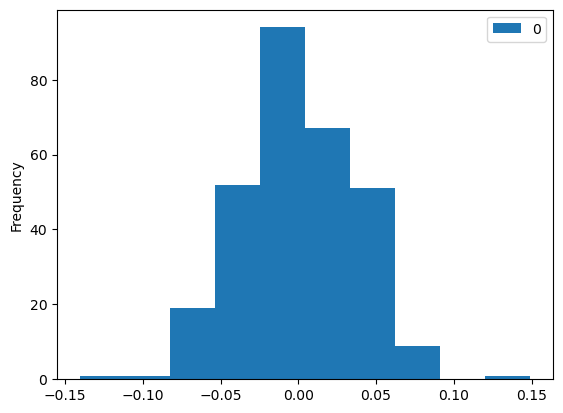

In [33]:
# density plots
print (residuals.plot(kind='hist'))


Axes(0.125,0.11;0.775x0.77)


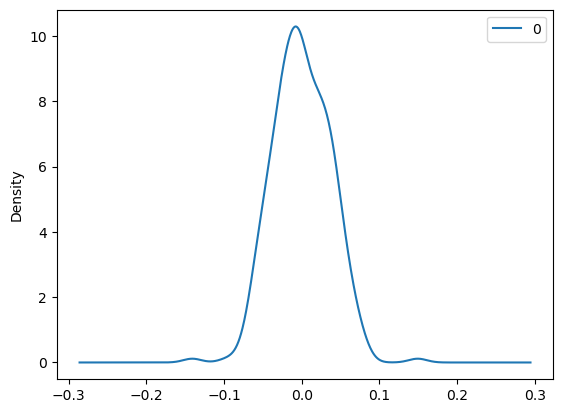

In [34]:
print (residuals.plot(kind='kde'))

We can see that the distribution of residuals is a Normal/Gaussian distribution, because:
- The graphs suggest a Gaussian-like distribution, it has a bell curve
- mean ~ 0 (also median and mode) 
- symetric
- Even though the p-value surpassed the defined limit we used it is still considered a Gaussian distribution and a stationary time series with a 94.9% confidence.
 

## 6) Model validation

In [59]:
# Validate the arima model with the validate dataset vs the ARIMA prediction
def validate_arima_model(train_test, validate, arima_order):
    
    train_test = train_test.astype('float32')
    validate = validate.astype('float32')
    
    # walk-forward validation
    history = [x for x in train_test]
    predictions = []
    for i in range(len(validate)):
        # predict
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit() #disp=0
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        # observation
        obs = validate[i]
        history.append(obs)
        #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

    # report performance
    rmse = sqrt(mean_squared_error(validate, predictions))
    return rmse, validate, predictions
    # print('RMSE: %.3f' % rmse)

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print (f"dataset \n {dataset}")
print (f"validation \n {validation}")
print (f"best_cfg \n {best_cfg}")


# fit ARIMA model on training set and best_cfg
rmse, validation_dup, predictions = validate_arima_model(dataset, validation, best_cfg)
print('VALIDATE ARIMA%s RMSE=%.3f' % (best_cfg,rmse))

# evaluate predictions using MSE, MAE, and RMSE
mse = mean_squared_error(validation, predictions)
mae = mean_absolute_error(validation, predictions)
rmse = np.sqrt(mse)

print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)

dataset 
 t0      0.998721
t1      0.931575
t2      1.014708
t3      1.014708
t4      1.014708
          ...   
t795   -1.287434
t796   -1.271447
t797   -1.274644
t798   -1.255460
t799   -1.329001
Name: 4, Length: 800, dtype: float64
validation 
 t800   -1.287434
t801   -1.290631
t802   -1.313013
t803   -1.313013
t804   -1.396146
          ...   
t895   -1.076404
t896   -1.015653
t897   -0.986877
t898   -1.044430
t899   -1.025246
Name: 4, Length: 100, dtype: float64
best_cfg 
 (2, 0, 2)
VALIDATE ARIMA(2, 0, 2) RMSE=0.028
MSE: 0.001
MAE: 0.023
RMSE: 0.028


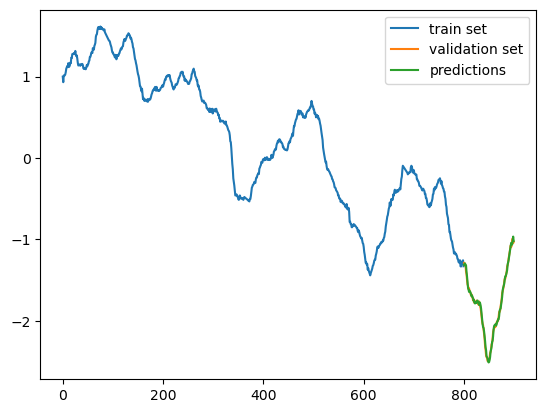

dataset 
 t0      0.998721
t1      0.931575
t2      1.014708
t3      1.014708
t4      1.014708
          ...   
t795   -1.287434
t796   -1.271447
t797   -1.274644
t798   -1.255460
t799   -1.329001
Name: 4, Length: 800, dtype: float64
validation 
 t800   -1.287434
t801   -1.290631
t802   -1.313013
t803   -1.313013
t804   -1.396146
          ...   
t895   -1.076404
t896   -1.015653
t897   -0.986877
t898   -1.044430
t899   -1.025246
Name: 4, Length: 100, dtype: float64
diff validation-predictions 
 t800    0.027344
t801    0.011115
t802   -0.018564
t803   -0.001283
t804   -0.078941
t805   -0.030932
t806   -0.045179
t807   -0.023326
t808    0.025373
t809   -0.000699
t810    0.043649
t811   -0.001054
t812   -0.002268
t813   -0.013233
t814   -0.014457
t815    0.023399
t816   -0.014851
t817   -0.008463
t818   -0.021066
t819    0.021488
t820   -0.027093
t821    0.004887
t822    0.022443
t823    0.000098
t824   -0.005318
t825    0.028973
t826   -0.004308
t827   -0.027241
t828   -0.003713
t829  

In [61]:
# Plot 'train set','validation set','predictions'

t = np.array([x for x in validation])
t = t.flatten()

pyplot.plot([x for x in dataset]) #first 800 mov
pyplot.plot([None for i in dataset] + [x for x in t]) #100 mov. true (validation)
pyplot.plot([None for i in dataset] + [x for x in predictions]) #100 mov. predictions
pyplot.legend(['train set','validation set','predictions'])
pyplot.show()

# plot predictions and expected results
print (f"dataset \n {dataset}")
print (f"validation \n {validation}")

# See the diferences between validation and predictions
diff = validation-predictions
# set display option to show all rows
pd.set_option('display.max_rows', None)
print (f"diff validation-predictions \n {diff}")
# reset display option to default
pd.reset_option('display.max_rows')


## We can see that the **results for the validation dataset were good**, because:
- the RMSE for validation dataset (RMSE=0.028) was even better than the RMSE for TrainTest dataset (RMSE=0.036) and the persistency model (RMSE=0,029)
- The prediction and the validation set are almost 100% aligned 
The model is validated